# TASK-7: Get Basic Sales Summary from a Tiny SQLite Database using Python

## Importing neccessary Libraries

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Creating a SQLite Database and Inserting Sample Data.

In [4]:
def create_database():
    conn = sqlite3.connect("sales_data.db")
    cursor = conn.cursor()
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
    )
    """)
    sample_data = [("Apple", 10, 1.2),
                   ("Banana", 20, 0.5),
                   ("Orange", 15, 0.8),
                   ("Apple", 5, 1.2),
                   ("Banana", 10, 0.5),
                  ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    
    conn.commit()
    conn.close()

## Query the Database

In [5]:
def query_sales_data():
    conn = sqlite3.connect("sales_data.db")

    query = """
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue 
    FROM sales 
    GROUP BY product
    """

    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

## Display and Plot

Sales Summary:
  product  total_qty  revenue
0   Apple         15     18.0
1  Banana         30     15.0
2  Orange         15     12.0


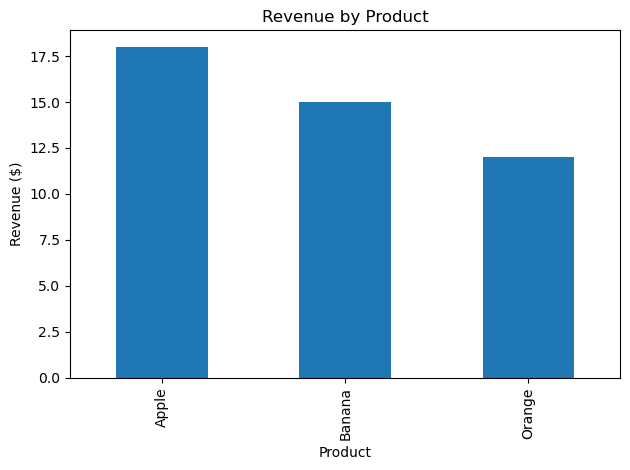

<Figure size 640x480 with 0 Axes>

In [6]:
def display_results(df):
    print("Sales Summary:")
    print(df)

    # Plot bar chart
    df.plot(kind='bar', x='product', y='revenue', legend=False)
    plt.title("Revenue by Product")
    plt.ylabel("Revenue ($)")
    plt.xlabel("Product")
    plt.tight_layout()
    plt.show()
    # To Save chart
    plt.savefig("sales_chart.png")

if __name__ == "__main__":
    create_database()
    df = query_sales_data()
    display_results(df)